In [323]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

# Linear Regression
Linear Regression can be solved in two ways,
* Normal equation
* iterative approach of gradient descent

### 1. Normal equation
This type of solution is available only for linear regression. It gives the result directly using this equation
$$\hat{\theta} = (X^TX)^{-1}(X^Ty)$$
$y - $ vector of target values from 1 to m\
$X - $ design matrix of data of shape $(n+1) \times (n+1)$, n = number of features\
$\hat{\theta} - $ minimised parameters

In [32]:
# example
np.random.seed(42)                 # to get reproduceable results

m = 100                            # number of instances
X = 2 * np.random.randn(m,1)       # data
y = 4 + 3*X + np.random.randn(m,1) # target - function is 4 + 3x_1 + noise. theta_0 = 4, theta_1 = 3 

X_b = add_dummy_feature(X) # add bias term

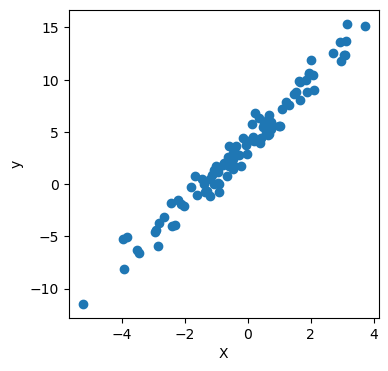

In [33]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(X,y)
ax.set_xlabel("X")
ax.set_ylabel("y")
plt.show()

#### a. Training using equation given manually

In [34]:
theta_hat = np.linalg.inv(X_b.T @ X_b) @(X_b.T @ y)
theta_hat # theta_0 and theta_1

array([[4.00742783],
       [2.92837142]])

The expected value was 4 and 3 as saw in our created labels, but it was unattainable due to the presence of noise created by us in the dataset

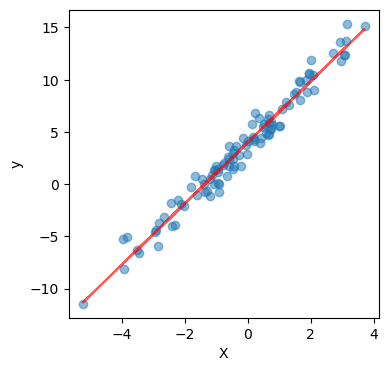

In [28]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(X,y, alpha=0.5)
ax.plot(X, theta_hat[0] + theta_hat[1] * X, color="red", alpha=0.65)
ax.set_xlabel("X")
ax.set_ylabel("y")
plt.show()

#### b. Training using scikit-learn

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lin_reg = LinearRegression()    # creating an instance
lin_reg.fit(X,y)                # training

lin_reg.intercept_, lin_reg.coef_

(array([4.00742783]), array([[2.92837142]]))

Note that scikit-learn works based on computing presudo inverse for $X = X^+$ that is Moore-Penrose inverse. This is computed by performing **SVD** and then computing the pseudoinverse using the equation,
$$X^+ = V\sum^+U^T$$, where all three vectors are singular vectors obtained from SVD. The advatages of this approach are,
* Can be used if $(X^TX)$ is non-invertible.
* Normal equation is of order $O(n^{2.4}$ to $O(n^3)$, wherase the SVD approach is of the order $O(n^2)$

The problem with these two approaches are that they becomes slower as the the number of features increases (features > 1,00,000) (since X matrix depends upon the number of features). In that case its best suited to use **GD** to `fit in memory`

### 2. Gradient Descent
Uses a cost function or loss function to compute the parameters by minimising the function. Since the cost function used for linear regression (MSE) is a convex function, no local minima is present and therefore minimising it will eventually lead to gloabl minima.

Note that in GD, all features must have similar scale or else it will lead to,
* result getting biased towards the feature of higher scale.
* Slower convergence of the feature of higher scale as it will take time to reach global minima. Since the higher value of feature is due to the higher value of the data for that feature (take derviative and see), therefore the range of feature with higher scale will be far higher and therefore will have slower convergence.\
![title](../images/GD1.png)

Therefore, feature scaling is a must.

#### a. Batch Gradient descent

Done over the full training set
in matrix form, the partial derivative with respect to each parameter will be of the form,
$$\nabla\theta = \frac{1}{m}(X^T(X\theta - y))$$

$\nabla\theta$ - a vector of partial derivative of cost function with respect to all parameters

In [86]:
# implementation from scratch
lr = 0.01
epochs = 1000
m = len(X_b)                 # length of data

np.random.seed(42)

theta = np.random.randn(2,1) # initialisation of parameters

for epoch in range(epochs):
    gradients = 1/m * X_b.T @ (X_b @ theta - y)

    cost = (1/(2*m) * (X_b @ theta - y)**2).sum()

    if epoch % 100 == 0 or epochs <=10:
        print(f"\ncost : {cost}")
        print(f"gradient: {gradients.flatten()}")
        print(f"parameters : {theta.flatten()}")
        
    theta = theta - lr * gradients


cost : 19.928729795072538
gradient: [-2.8737948  -9.41903735]
parameters : [ 0.49671415 -0.1382643 ]

cost : 1.4259861984477495
gradient: [-1.34676957 -0.43076361]
parameters : [2.61547841 2.71083959]

cost : 0.5767208362137399
gradient: [-0.51159661 -0.05617579]
parameters : [3.48550212 2.87863889]

cost : 0.46057784946137814
gradient: [-0.19111482 -0.01740905]
parameters : [3.81268183 2.91088804]

cost : 0.4444257916867268
gradient: [-0.07128656 -0.00637261]
parameters : [3.93479452 2.92188711]

cost : 0.44217920367479446
gradient: [-0.02658653 -0.00237258]
parameters : [3.98033929 2.92595433]

cost : 0.4418667256243224
gradient: [-0.0099154  -0.00088471]
parameters : [3.99732521 2.92747001]

cost : 0.4418232630346352
gradient: [-0.00369793 -0.00032995]
parameters : [4.00366008 2.92803524]

cost : 0.44181721782058064
gradient: [-0.00137913 -0.00012305]
parameters : [4.00602266 2.92824604]

cost : 0.4418163769914164
gradient: [-5.14344873e-04 -4.58921924e-05]
parameters : [4.00690377

To find the best learning rate, we can use GridSearchCV or randomisedCv as it helps in computing the best hyperparameter combination.

#### b. SGD
picks a random instance in the training set at every step and computes the gradients based on that particular instance. Since one data is used at a atime, the derviative will not be the optimal value and therefore optimisation bounces and eventually reaching the minimium. After reaching near the minimum, it bounces of here and there, giving a good parameter value but not the optimum value. This occurs due to variation between instances.
![title](../images/GD2.png)
The advantages are,
* Since one data is used at a time, will be much faster. But in case of the dataset being small, this method can be slower as it may take more time to take the data from memory each time that to perform bach gradient descent.
* Due to irregular bouncing at each step, it can minimise irregular cost function by being able to jump off the local minima's (shows why it does get near minima and never approches minima). Can be avoided by using dynamic learning rate by decreasing the learning rate gradually, thereby reachign the global minima. This is called as **simulated annealing**. The scheduling of this learning rate is called **learning schedule**.

In [120]:
# implementation from scratch
epochs = 30         # goes through the entire dataset only 30 times. Very fast
t0, t1 = 1, 10      # learning rate schedule

np.random.seed(42)
theta = np.random.randn(2,1)

def lr_schedule(t):
    return t0/(t + t1) # starts from 0.1

for epoch in range(epochs):
    for iters in range(m):
        
        rdn_idx = np.random.randint(m)

        xi = X_b[rdn_idx: rdn_idx+1]
        yi = y[rdn_idx: rdn_idx+1]

        gradients = 1 * xi.T @ (xi @ theta - yi)  # since one data, dont take average
        
        if iters % 100 == 0 or epochs <=10:
            print(f"\ncost : {cost}")
            print(f"gradient: {gradients.flatten()}")
            print(f"parameters : {theta.flatten()}")

        lr = lr_schedule(epoch * m + iters)

        theta = theta - lr * gradients



cost : 0.44181626041686606
gradient: [-12.34100606 -37.96183718]
parameters : [ 0.49671415 -0.1382643 ]

cost : 0.44181626041686606
gradient: [-0.75808093 -1.11963487]
parameters : [3.75685897 2.80535344]

cost : 0.44181626041686606
gradient: [0.64121458 0.37975328]
parameters : [3.834176   2.87029112]

cost : 0.44181626041686606
gradient: [ 1.71520541 -4.8874716 ]
parameters : [3.85650106 2.83967227]

cost : 0.44181626041686606
gradient: [1.32189458 1.35697087]
parameters : [3.86663845 2.94194926]

cost : 0.44181626041686606
gradient: [-0.36387939 -0.23585496]
parameters : [3.93165518 2.93050918]

cost : 0.44181626041686606
gradient: [ 0.02212292 -0.0206066 ]
parameters : [3.94000454 2.94030389]

cost : 0.44181626041686606
gradient: [ 1.01230811 -0.97014394]
parameters : [3.96464961 2.92385146]

cost : 0.44181626041686606
gradient: [ 1.03534049 -0.02794845]
parameters : [3.97086163 2.91942248]

cost : 0.44181626041686606
gradient: [-0.13001541  0.1019602 ]
parameters : [3.98180766 2.

SGD can be perfomed using **scikit-learn**

In [121]:
from sklearn.linear_model import SGDRegressor

In [133]:
sgd_reg = SGDRegressor(max_iter=500, tol=1e-5, penalty=None, eta0=0.1, # penalty - no regularisation
             n_iter_no_change=100, random_state=42) # perform for 500 epochs or till tolerance is less than 10^-5 for 100 consequetive epochs
# setting warm_start =True, continues hyperparameter value from where it left

sgd_reg.fit(X,y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.01777219]), array([2.92933305]))

#### Mini Batch GD
Takes batch of data instead of one data at a time. Advantages is that, we can do parallelisation using GPU's, therefore can be fastened. Also, Convergence will be faster. The down side is that, like SGD it stops near minimum and not at minimum. Can reach minimum only by using a good learning schedule.

# Polynomial Regression
used if data is more complex than a straight line

In [134]:
# example
np.random.seed(42)                 # to get reproduceable results

m = 100                            # number of instances
X = 6 * np.random.randn(m,1) - 3   # data
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1) # quadratic function

# X_b = add_dummy_feature(X) # add bias term

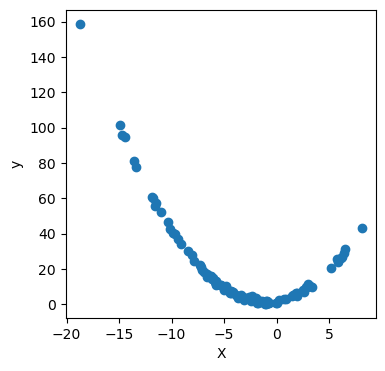

In [135]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(X,y)
ax.set_xlabel("X")
ax.set_ylabel("y")
plt.show()

In [214]:
def nl_fn(X, power):              # create a non linear function matrix
    bias_X = add_dummy_feature(X) # bias term

    for p in range(2, int(power)+1):

        bias_X = np.column_stack((bias_X,X**p)) # data matrix
    
    return bias_X

In [222]:
X_b = nl_fn(X, power=2) # data

In [224]:
# implementation from scratch using GD
lr = 0.0001                  # note: lr is very low
epochs = 100000
m = len(X_b)                 # length of data

np.random.seed(42)

theta = np.random.randn(3,1) # initialisation of parameters

for epoch in range(epochs):
    gradients = 1/m * X_b.T @ (X_b @ theta - y)

    cost = (1/(2*m) * (X_b @ theta - y)**2).sum()

    if epoch % 10000 == 0 or epochs <=10:
        print(f"\ncost : {cost}")
        print(f"gradient: {gradients.flatten()}")
        print(f"parameters : {theta.flatten()}")
        
    theta = theta - lr * gradients


cost : 135.2034978747225
gradient: [   8.87836952 -100.50710413 1161.10572043]
parameters : [ 0.49671415 -0.1382643   0.64768854]

cost : 0.5996120217840222
gradient: [-0.47881123 -0.01823108  0.00245979]
parameters : [1.12616701 0.9898242  0.50894744]

cost : 0.47048005934060894
gradient: [-0.25155468 -0.00956557  0.00129324]
parameters : [1.47925557 1.00325247 0.50713235]

cost : 0.4348375492921884
gradient: [-0.13215989 -0.00502549  0.00067943]
parameters : [1.6647586  1.01030637 0.50617868]

cost : 0.42499964008113333
gradient: [-0.06943316 -0.00264025  0.00035695]
parameters : [1.76221677 1.0140123  0.50567765]

cost : 0.4222842180327573
gradient: [-0.03647827 -0.00138712  0.00018753]
parameters : [1.81341861 1.01595929 0.50541442]

cost : 0.42153471763154127
gradient: [-1.91646754e-02 -7.28752046e-04  9.85252801e-05]
parameters : [1.84031864 1.01698218 0.50527613]

cost : 0.4213278433993171
gradient: [-1.00685918e-02 -3.82866221e-04  5.17624641e-05]
parameters : [1.85445118 1.01

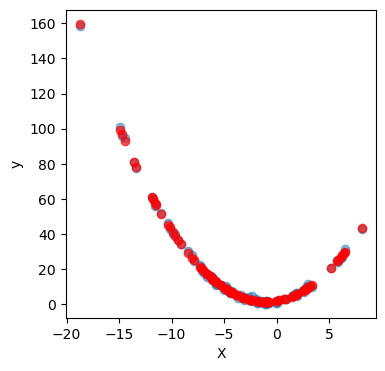

In [206]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(X,y, alpha=0.5)
ax.scatter(X, theta[0] + theta[1] * X + theta[2] * X**2, color="red", alpha=0.65)
ax.set_xlabel("X")
ax.set_ylabel("y")
plt.show()

using **scikit-learn**

In [210]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False) # create degree 2 data matrix
X_poly = poly_features.fit_transform(X)

In [211]:
lin_reg = LinearRegression() # fit linear regression
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.87009469]), array([[1.01811444, 0.50512305]]))

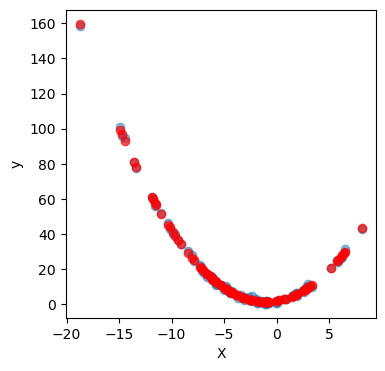

In [212]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(X,y, alpha=0.5)
ax.scatter(X, lin_reg.intercept_ + lin_reg.coef_[0,0] * X + lin_reg.coef_[0,1] * X**2, color="red", alpha=0.65)
ax.set_xlabel("X")
ax.set_ylabel("y")
plt.show()

In reality, we are not sure what degree to use. In that case, use
* use cross validation
* plot curve for each degree

Another way is to use **learning curves** on different degrees. It is to plot the training and validation error as a function of training iterations on each cross validation set

In [225]:
from sklearn.model_selection import learning_curve

In [240]:
train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(),
                                                         X, y, train_sizes=np.linspace(0.01,1.0, 40), 
                                                         cv = 5, scoring="neg_root_mean_squared_error")

In [244]:
train_err = -train_scores.mean(axis=1)
valid_err = -valid_scores.mean(axis=1)

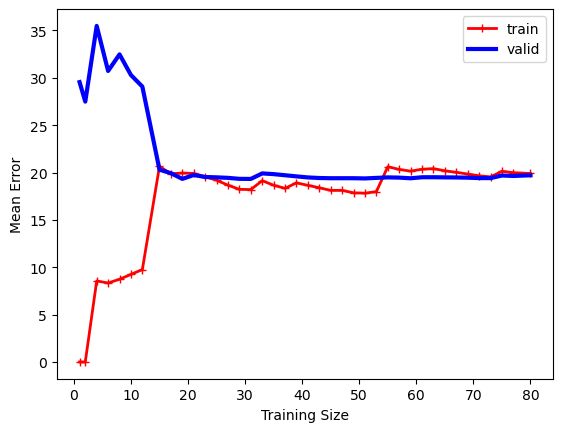

In [247]:
plt.plot(train_sizes, train_err, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_err, "b-", linewidth=3, label="valid")
plt.xlabel("Training Size")
plt.ylabel("Mean Error")
plt.legend()

the model is underfitting because,
* With small instances of training set (start of curve), the model fits well.
* As training data increases, our linear model training error increases.

Lets try with 10th degree polynomial

In [248]:
from sklearn.pipeline import make_pipeline

In [268]:
poly_reg = make_pipeline(PolynomialFeatures(degree=10, include_bias=False),
                         LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(poly_reg,
                                                         X, y, train_sizes=np.linspace(0.01,1.0, 40), 
                                                         cv = 5, scoring="neg_root_mean_squared_error")

In [269]:
train_err = -train_scores.mean(axis=1)
valid_err = -valid_scores.mean(axis=1)

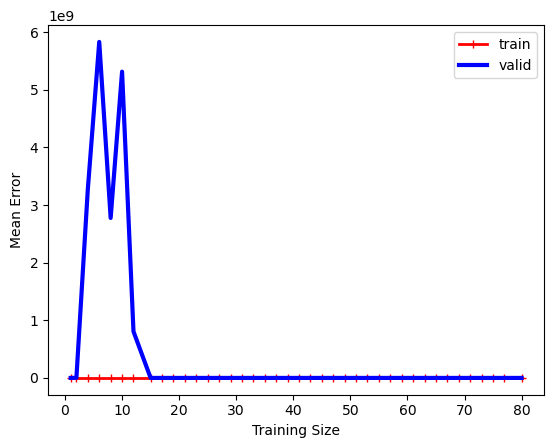

In [270]:
plt.plot(train_sizes, train_err, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_err, "b-", linewidth=3, label="valid")
plt.xlabel("Training Size")
plt.ylabel("Mean Error")
plt.legend()
plt.show()

# Regularised Linear Models
If our model's validation error doesn't decrease over time but our training error decreases, it means that our model has overfit. it can be avoided by,
* Reduce the model degree
* Introduce **regularisation**
  * Lasso regression
  * Ridge regression
  * Elastic net regression
* Early stopping

Note that the regularisation is used only with the cost function during training and not during evaluation.

### a. Ridge Regression
$$J(\theta) = MSE(\theta) + \frac{\alpha}{m}\sum_{i=1}^{n} \theta_i^2$$

In [290]:
sgd_params = []

for i in [0,1e-3,0.1,1]:
    sgd_reg = SGDRegressor(penalty="l2", alpha=i/m, tol=None, # since SGD, no 1/m, therefore added with alpha
                           max_iter=1000, eta0=0.01, random_state=42)
    sgd_reg.fit(X,y.ravel())
    
    sgd_params.append([sgd_reg.intercept_.item(), sgd_reg.coef_.item()])

In [291]:
sgd_params

[[8.251997840943009, -2.776718316794295],
 [8.252001721847341, -2.776717125354382],
 [8.252385918459485, -2.7765991766669496],
 [8.25587744181012, -2.7755272667065483]]

### b. Lasso Regression
$$J(\theta) = MSE(\theta) + 2\alpha\sum_{i=1}^{n} \theta_i$$

A characteristic of lasso is that for a paritcular $\alpha$ value, the least importatnt features could get to 0. Therefore, it automatically performs feature selection. But this can lead to loss in data, which is not the case in ridge regression due to squaring.

### c. Elastic net regression
It is a middle ground between ridge and lasso. when,
* r=0, it is ridge
* r=1, it is lasso
$$J(\theta) = MSE(\theta) + \frac{\alpha}{m}\sum_{i=1}^{n} \theta_i^2 + 2\alpha\sum_{i=1}^{n} \theta_i$$

Ridge is preferred by default, but if we are certain that there are some useless features, we can increase the `r` value (perform lasso as well).

In [292]:
from sklearn.linear_model import ElasticNet

In [294]:
els_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1ratio = r-value
els_net.fit(X,y)
els_net.intercept_, els_net.coef_

(array([8.37379531]), array([-3.11507987]))

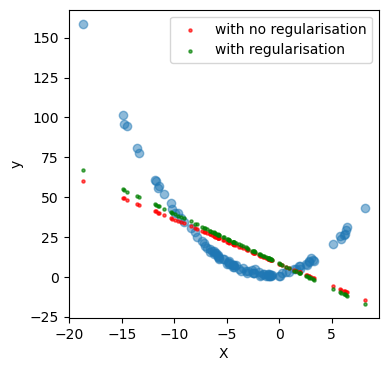

In [304]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(X,y, alpha=0.5)
ax.scatter(X, sgd_reg.intercept_ + sgd_reg.coef_* X, color="red", alpha=0.65, s=5, label="with no regularisation")
ax.scatter(X, els_net.intercept_ + els_net.coef_* X, color="green", alpha=0.65, s=5, label="with regularisation")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.legend()
plt.show()

### d. Early stopping
It avoids overfitting by stopping the training as soon as the validation error reaches the minimum. That is, since if the model is overfitting, beyond a certain limit, the validation error increases. Therefore, the parameter value is chosen which is the value when the validation error was minimum.

In [333]:
# implemetation
X_train, X_valid,y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from copy import deepcopy # copies both hyperparameters and learned parameters
# in contrast, the sklearn.base.clone() copies only the hyperparameters

In [364]:
model = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                      StandardScaler())

X_train_prep = model.fit_transform(X_train)
X_valid_prep = model.fit_transform(X_valid)

std = StandardScaler()
y_train_prep = std.fit_transform(y_train)
y_valid_prep = std.fit_transform(y_valid)

sgd_reg = SGDRegressor(penalty=None, eta0=0.001, random_state=42)

epochs = 10000

best_valid_rmse = np.inf

for epoch in range(epochs):
    sgd_reg.partial_fit(X_train_prep, y_train.ravel()) # performs incremental learning
    
    y_valid_pred  = sgd_reg.predict(X_valid_prep)

    val_err = root_mean_squared_error(y_valid.ravel(), y_valid_pred.ravel())

    if val_err < best_valid_rmse:
        
        best_valid_rmse = val_err
        ep = epoch
        best_model = sgd_reg

print(f"Total number of epochs : {epochs} | Validation error {val_err}\nTraining started overfitting after epoch : {ep} | Validation error {best_valid_rmse}")

Total number of epochs : 10000 | Validation error 13.985363100825777
 Training started overfitting after epoch : 2423 | Validation error 13.171404318220329


We can see that the model started overfitting after a 2423 epochs.

# Logisitic Regression

Used for binary classfication on if an instance belongs to a particular class. It is such that the linear regression function is passed on to a function called **sigmoid**, so that the output will be a probability like value.

$$z = \theta^T X$$
$$\sigma(z) = \frac{1}{1+e^{-z}}$$

Linear regression cannot be used since the data distribution is binomial and the error is also binomial, which is not the case for lienar regression (nromal distribution error)

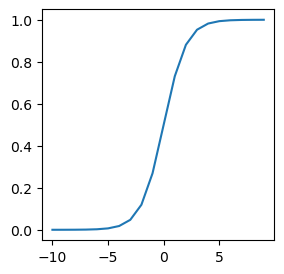

In [369]:
# example
z = np.arange(-10,10)
sig_z = 1/(1+np.exp(-z))

plt.figure(figsize=(3,3))
plt.plot(z, sig_z)

The linear regression cannot be used directly, since the linear regression is not a proper fit for the `probabilities`. Also, since the range is between 0 and 1, it is difficult to find how is the target variables ($\theta$) is changing with a little change in the data. Therefore, log-odds comes to the picture, which converts the data from $-\infty$ to $+\infty$.

The log-odds is comes from the concept of odd ratio and log of odds.
$$odds\ ratio = \frac{p}{1-p}$$
$$log\ of\ odds = log(\frac{p}{1-p})$$
This is called the `logit function`. The logit function approaches infinity at both the extremes, $-\infty$ to $+\infty$. that is why, log-odds is used. The `inverse` of logit is **sigmoid**
$$sigmoid(logit(p)) = p$$
Therefore, the sigmoid function maps the values back to probability.

Therefore, the following steps are followed,
1. Compute log odds, which is the scaled version of y/
2. Therefore now, $$y = log(\frac{p}{1-p}) = \theta^TX = z$$
3. Now that the data points are projected onto the logit curve, the values are converted back to probability again by taking the sigmoid. Thats how the $\sigma$ equation was formed.
4. Considering each data point to be IID, find the likelihood and log-likelihood for turning multiplication into addition.

Therefore, the loss function used is called **log loss**, given by the equation,
$$J(\theta) = -\frac{1}{m} \sum_{i=1}^my^ilog(p^i) + (1-y^i) log(1-p^i)$$

The gradient after dervation will be having the **same as linear regression**.

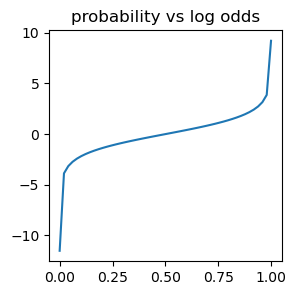

In [377]:
# logit function
p = np.linspace(1e-5,0.9999,50)
loo = np.log(p/(1-p))
plt.figure(figsize=(3,3))
plt.plot(p, loo)
plt.title("probability vs log odds")
plt.show()

#### Example of logistic regression
Iris dataset to predict whether the flower is `Iris Virginica` using the petal width and peta length data

In [378]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

In [467]:
X = iris.data[["petal width (cm)", "petal length (cm)"]].values            # petal length and width data as array
y = iris.target_names[iris.target] == "virginica"                          # binary values of target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # test and training data

In [531]:
log_reg = LogisticRegression(random_state=42) # adds l2 regularisation by default
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Since at boundary, z-value = 0, therefore,
$$0 = \theta_0 + \theta_1 X_1 + \theta_2 X_2$$

Rearraging it we get the value for x2,

In [521]:
# to plot the decision boundary

left_right = np.array([X_train[:,0].min(),X_train[:,0].max()]) # range of petal width

boundary = -((log_reg.coef_[0,0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0,1]) # range of petal length

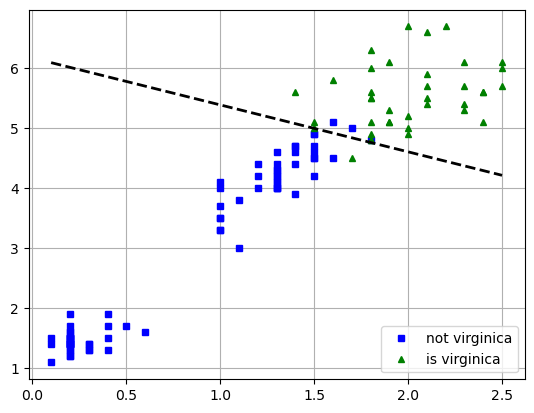

In [543]:
plt.plot(X_train[y_train ==0, 0], X_train[y_train==0, 1], "bs", label="not virginica", markersize=4)
plt.plot(X_train[y_train ==1, 0], X_train[y_train==1, 1], "g^", label="is virginica", markersize=4)
plt.plot(left_right, boundary, "k--", linewidth=2)

plt.grid(1)
plt.legend()
plt.show()

# Softmax Regression
The logistic regression can be generalised to support multiple classes directly without having to train and combine multiple binary classifiers (done in L3_mnist notebook). This is called as **softmax regression** or **multinomial regression**.

The idea is that,
* The model first computes a score for each class.
* Use softmax function (normalised exponential) on that score to get the probaiblity like value
$$p_i = S(z_i) = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_i}}$$, p - vector of probability of each class
* Softmax returns the class with the highest estimated probaility, that is
$$\hat{y_k} = argmax(p)$$, k- class with the highest estimated probability


Note that the softmax is used to predict only one class at a time. Therefore not to be used with multilabel classifier.

### Cost function
The cost function used is the **cross entropy**.
$$J(\theta) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K y_k^ilog(p_k^i)$$

Note that, if K=2, it is equivalent to log loss function

In [544]:
# iris dataset using softmax to classify all the data
# x remains the same
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # test and training data

In [545]:
softm_reg = LogisticRegression(C=30, random_state=42)
softm_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [565]:
# predict the class for petal width = 5cm and petal length = 2cm
t_names = iris.target_names

t_names[np.argmax(softm_reg.predict_proba([[5,2]]).round(5))].item()

'virginica'

In [580]:
# predict class for test data from scratch

y_pred = []
for data in X_test:

    pr = softm_reg.predict_proba([data]).round(5) # probability of each class for the data
    
    y_pred.append(np.argmax(pr).item())           # index of the highest probability

In [592]:
acc = (y_pred == y_test.values).sum().item()/ len(y_pred) *100 # accuracy score
acc

100.0

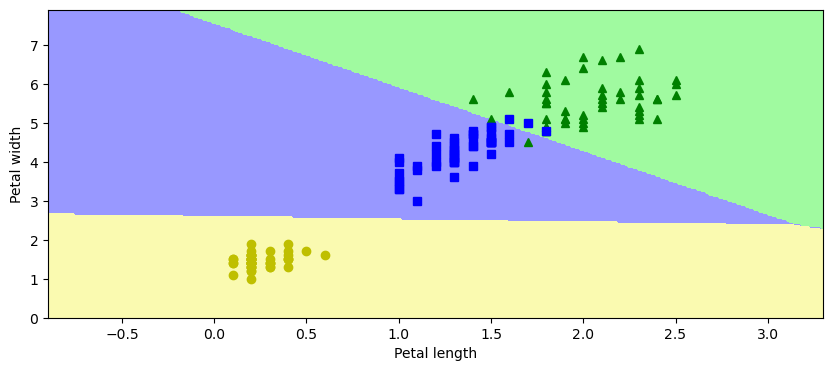

In [636]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(X_test[:,0].min()-1, X_test[:,0].max()+1, 500).reshape(-1, 1),
                     np.linspace(X_test[:,1].min()-1, X_test[:,1].max()+1, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = softm_reg.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()